# **Sudoku por algoritmo  backtracking**

Descripción del Problema: Desarrolla un algoritmo eficiente para resolver un Sudoku utilizando una de las técnicas algorítmicas avanzadas: programación dinámica, divide y vencerás, o algoritmos voraces. Elige la técnica que consideres más adecuada y justifica tu selección en base a la estructura del problema y la complejidad computacional esperada.

En esta práctica, empleamos el algoritmo de retroalimentación para solucionar el Sudoku. Este método se muestra como la alternativa más adecuada, puesto que enfrenta el problema de manera holística, examinando todas las posibles soluciones de manera sistemática. En contraposición a la técnica de Divide y Vencerás, que no se ajusta adecuadamente a las limitaciones del Sudoku debido a la interrelación entre filas, columnas y submatrices, el backtracking asegura que se respeten todas las normas del juego en cada etapa. Si se produce un conflicto, el algoritmo regresa y evalúa con un valor nuevo, garantizando una búsqueda rigurosa y eficaz de la solución adecuada. Este procedimiento no solo aumenta la eficiencia, sino que además facilita el proceso de solución al abordar todo el tablero al mismo tiempo.

# **Librerias**

Importamos todas las librerías necesarias para nuestro proyecto de Sudoku en esta celda. Utilizamos random para generar valores aleatorios, sudoku para administrar tableros de Sudoku, matplotlib.pyplot para la visualización, copy para efectuar copias completas de listas, time para gestionar el tiempo, psutil para determinar el consumo de memoria y CPU, os para operaciones del sistema y statistics para efectuar cálculos estadísticos. Además, garantizamos que cada vez que se utiliza random.seed(time.time()), la semilla seleccionada es única.

In [69]:
#librerías y dependencias
!pip install py-sudoku
!pip install psutil
import random
import sudoku
import matplotlib.pyplot as plt
from copy import deepcopy
import time
from IPython.display import clear_output
import psutil
import os
random.seed(time.time())


# **Funciones para dibujar el Sudoku**

En esta celda, establecimos la función dibujar_sudoku con el propósito de ilustrar el tablero de Sudoku. Empleamos matplotlib.pyplot para elaborar una representación gráfica del Sudoku, destacando las celdas iniciales en color negro y las tareas en color rojo. Esto nos brinda la oportunidad de monitorear el avance y la condición actual del tablero a medida que se soluciona.

In [70]:
def dibujar_sudoku(matriz, tablero_original, asignaciones=[], pause_time=0.1):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_axis_off()

    # Crear la tabla basada en la matriz del sudoku
    tabla = ax.table(cellText=matriz, cellLoc='center', loc='center', edges='closed')

    for i in range(len(matriz)):
        for j in range(len(matriz[i])):
            cell = tabla[i, j]
            cell.set_fontsize(16)
            cell.set_height(0.1)

            if matriz[i][j] == 0:
                cell.get_text().set_text('')

            if (i // 3 + j // 3) % 2 == 0:
                cell.set_facecolor('lightblue')
                cell.set_alpha(0.3)

            # Marcar las celdas originales en negro
            if tablero_original[i][j] != 0:
                cell.get_text().set_color('black')

    # Color para las asignaciones
    for fila, col, num in asignaciones:
        cell = tabla[fila, col]
        cell.get_text().set_text(str(num))
        cell.get_text().set_color('red')

    plt.draw()
    plt.pause(pause_time)
    plt.show()
    return fig, ax, tabla


# **Funciones Auxiliares**

Esta celda contiene funciones auxiliares clave. encontrar_celda_vacia nos ayuda a localizar celdas vacías en el tablero. es_valido_en_submatriz valida si una asignación es correcta dentro de una submatriz de 3x3, y es_valido comprueba si el tablero actual es válido, considerando todas las restricciones del Sudoku.

In [71]:
def encontrar_celda_vacia(tablero):
    for i in range(9):
        for j in range(9):
            if tablero[i][j] == 0:
                return i, j
    return None

def es_valido_en_submatriz(num, fila, col, tablero):
    if num in tablero[fila]:
        return False
    if num in [tablero[i][col] for i in range(9)]:
        return False
    cuadro_fila = (fila // 3) * 3
    cuadro_col = (col // 3) * 3
    for i in range(cuadro_fila, cuadro_fila + 3):
        for j in range(cuadro_col, cuadro_col + 3):
            if tablero[i][j] == num:
                return False
    return True

def es_valido(tablero):
    for i in range(9):
        for j in range(9):
            if tablero[i][j] != 0:
                num = tablero[i][j]
                tablero[i][j] = 0
                if not es_valido_en_submatriz(num, i, j, tablero):
                    return False
                tablero[i][j] = num
    return True


# **Funciones de Resolución del Sudoku (Backtracking)**

En esta celda, establecimos la función resolver_sudoku, que emplea el procedimiento de backtracking para solucionar el Sudoku de forma recursiva. Este procedimiento asegura que se respeten todas las limitaciones del Sudoku en cada etapa. Si se encuentra un conflicto, el algoritmo retrocede y prueba con un nuevo valor, asegurando así una búsqueda exhaustiva y eficiente de la solución correcta.

In [72]:
def resolver_sudoku(tablero):
    vacia = encontrar_celda_vacia(tablero)
    if not vacia:
        return True  # El Sudoku está resuelto

    fila, col = vacia

    for num in range(1, 10):
        if es_valido_en_submatriz(num, fila, col, tablero):
            tablero[fila][col] = num
            dibujar_sudoku(tablero, tablero)  # Dibujar el proceso paso a paso
            if resolver_sudoku(tablero):
                return True
            tablero[fila][col] = 0  # Deshacer la asignación si no lleva a una solución

    return False  # Si no hay solución


# **Generación de Sudoku**

En esta celda, definimos la función genera_sudoku para generar un Sudoku. El nivel de dificultad puede ser 'bajo' o 'medio'. Utilizamos la librería sudoku para generar tableros de Sudoku y asignar celdas vacías según el nivel de dificultad seleccionado.

In [73]:
def genera_sudoku(dificultad='alto'):
    if dificultad == 'bajo':
        porcentaje_asignado = 0.3
    elif dificultad == 'medio':
        porcentaje_asignado = 0.5
    else:
        raise ValueError("Dificultad no válida. Elige entre 'bajo', o 'medio'.")

    sudoku_generado = sudoku.Sudoku(3, seed=time.time()).difficulty(porcentaje_asignado)
    tablero = [[0 if cell is None else cell for cell in fila] for fila in sudoku_generado.board]

    return tablero

# **Medición del Rendimiento**

En esta celda, definimos la función measure_performance para medir el tiempo de ejecución y el uso de memoria del algoritmo de resolución de Sudoku. Utilizamos psutil para obtener el uso de memoria antes y después de la ejecución, y time para calcular el tiempo transcurrido.

In [74]:
def measure_performance(algorithm, grid, level, history):
    process = psutil.Process(os.getpid())
    mem_before = process.memory_info().rss

    start_time = time.time()

    result = algorithm(grid)

    end_time = time.time()

    mem_after = process.memory_info().rss

    execution_time = end_time - start_time
    memory_used = mem_after - mem_before

    return result, len(history), execution_time, memory_used

# **Menú de Selección de Dificultad y Ejecución Principal**

Selecciona el nivel de dificultad del sudoku:
1. Bajo
2. Medio
Ingresa el número de la dificultad deseada (1, 2): 2
Sudoku inicial:


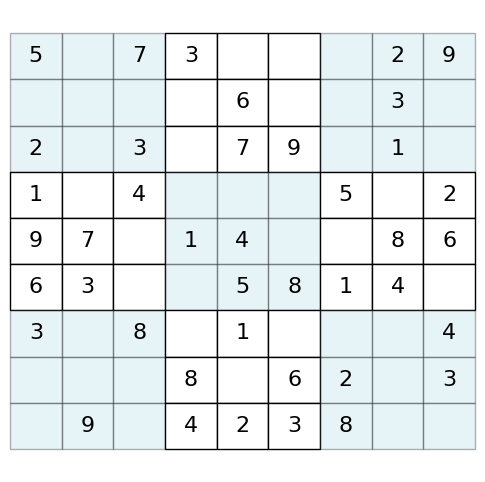

Resolviendo sudoku...


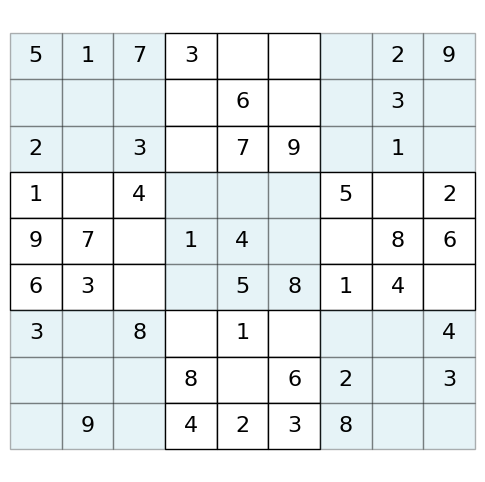

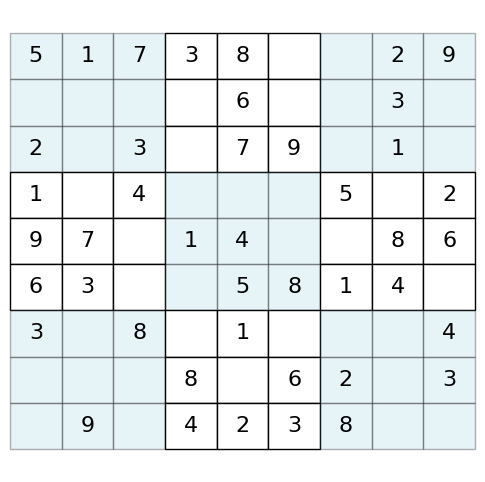

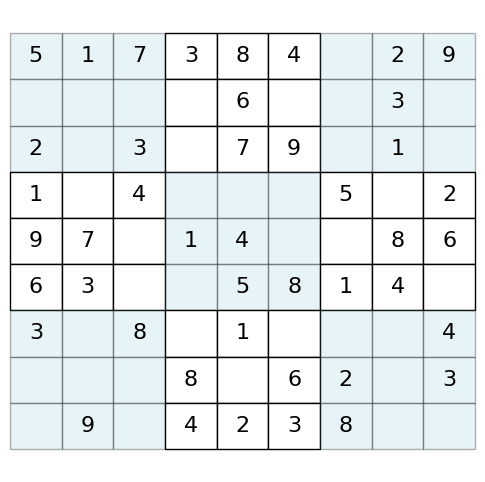

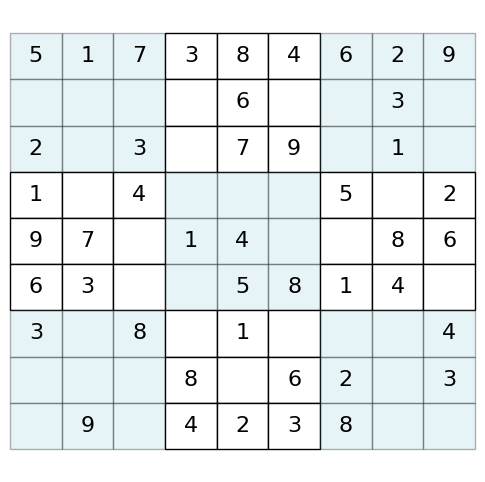

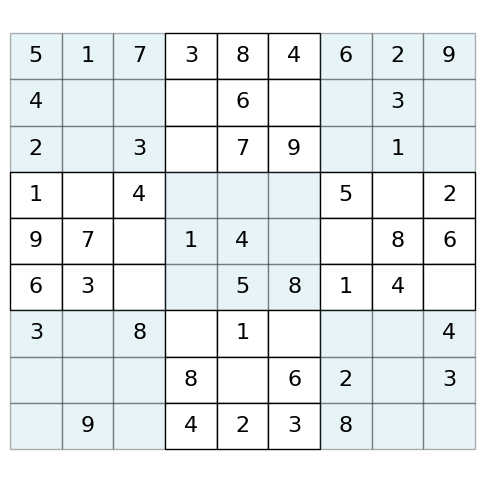

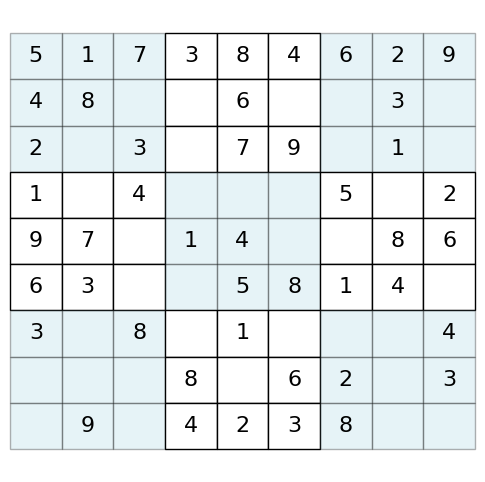

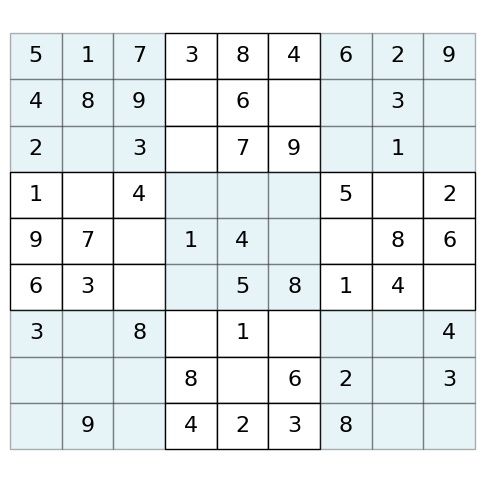

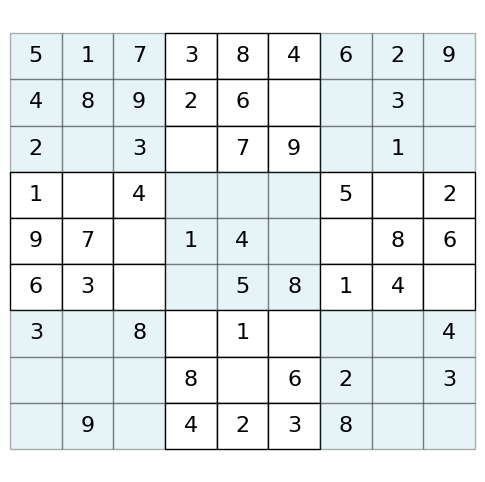

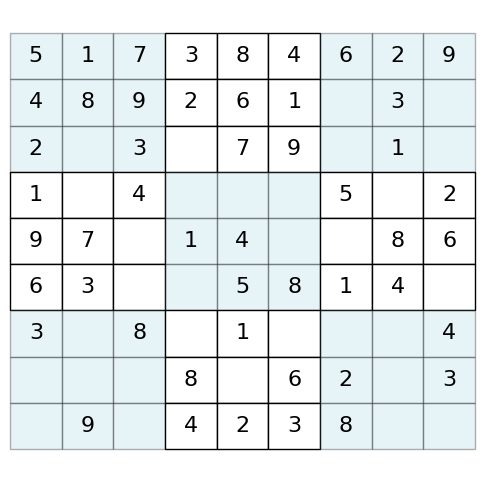

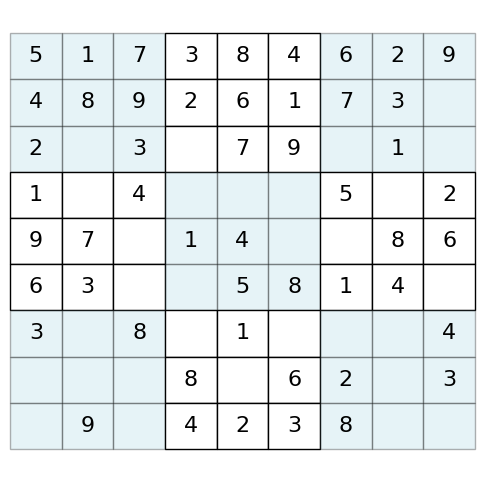

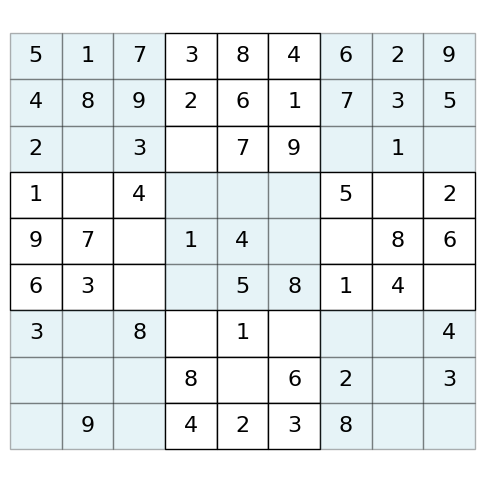

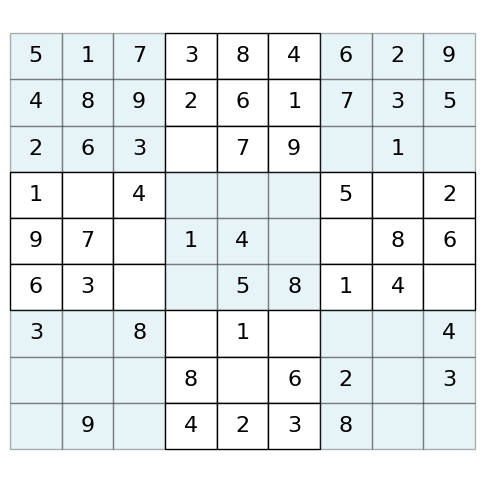

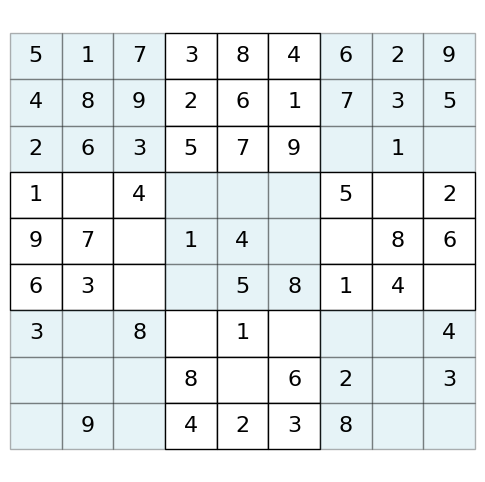

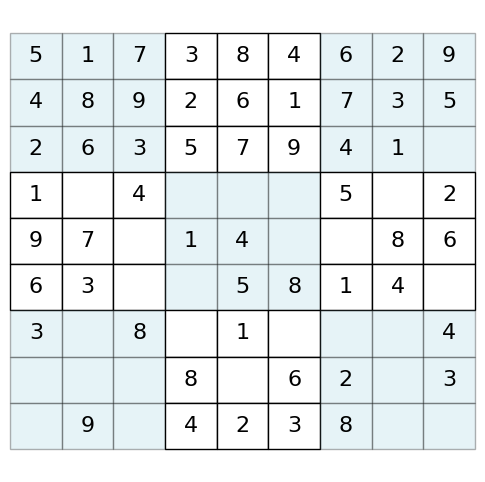

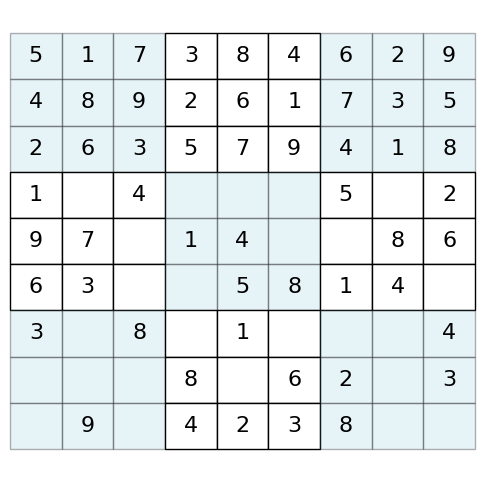

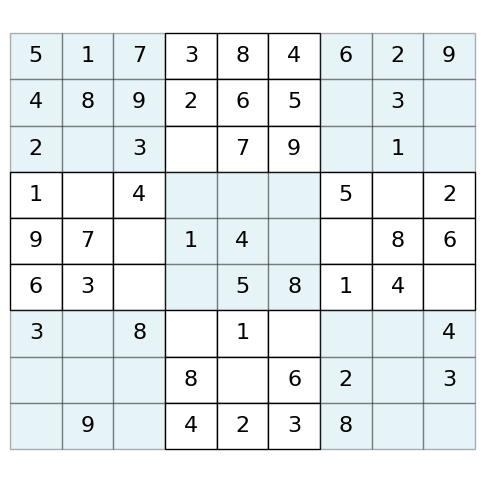

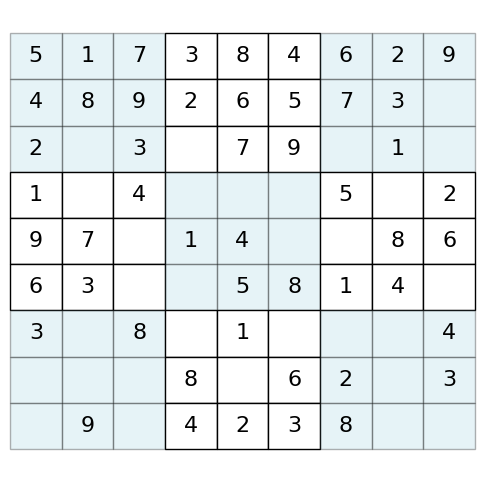

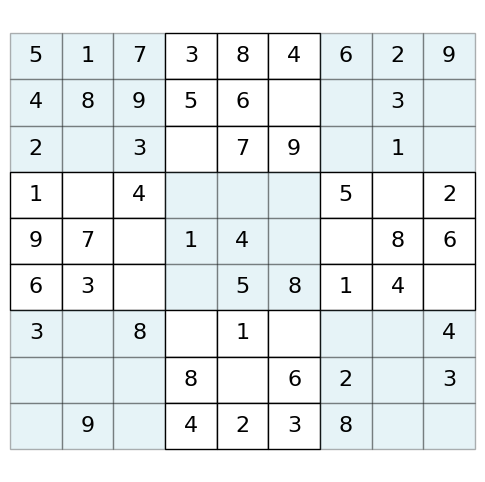

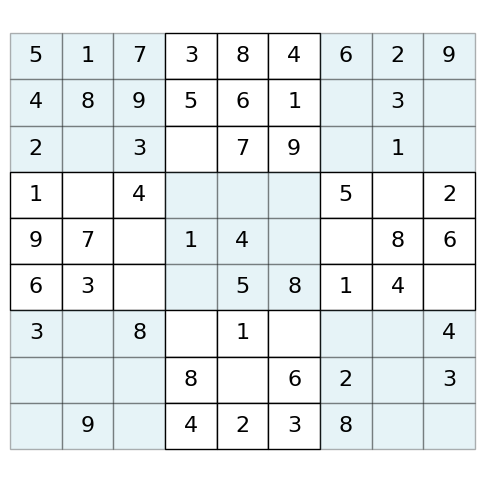

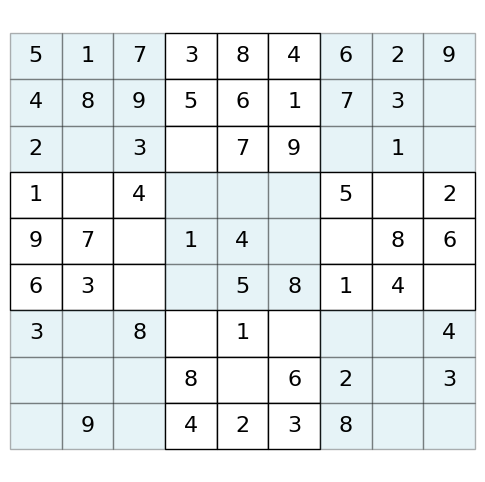

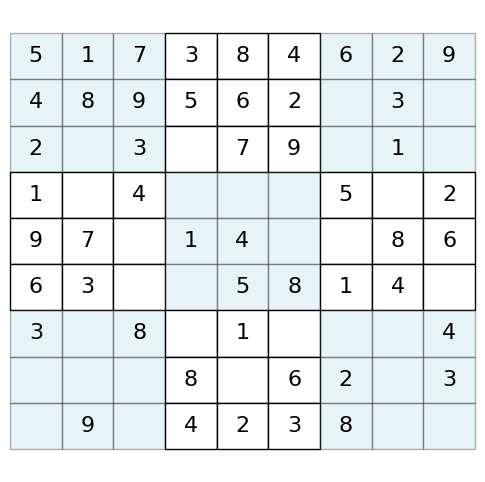

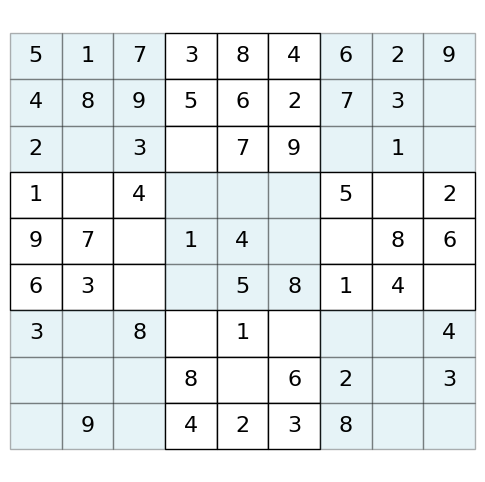

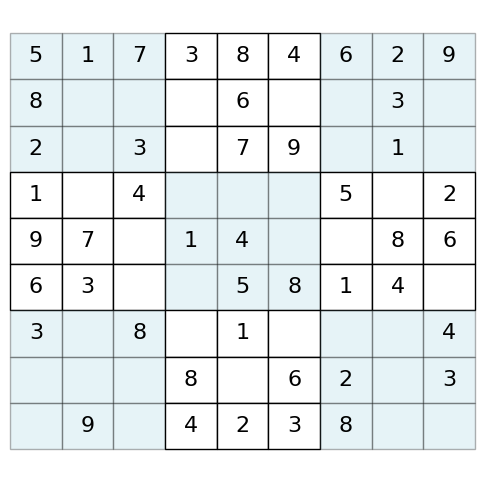

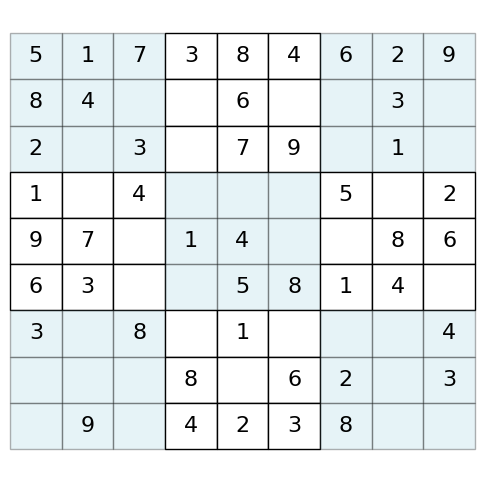

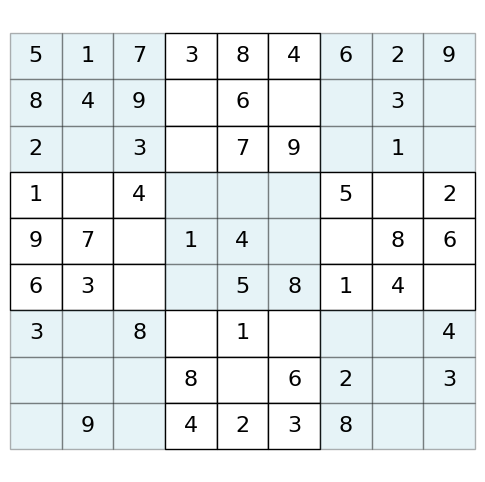

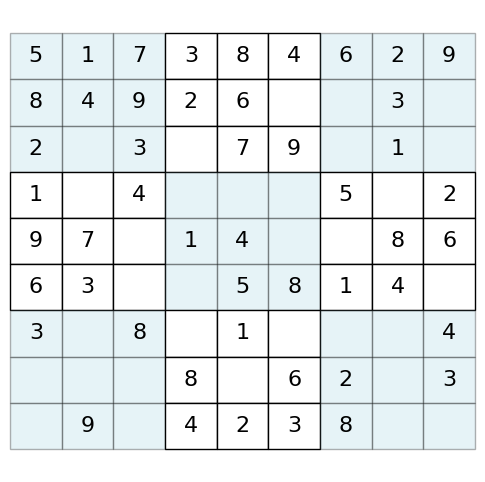

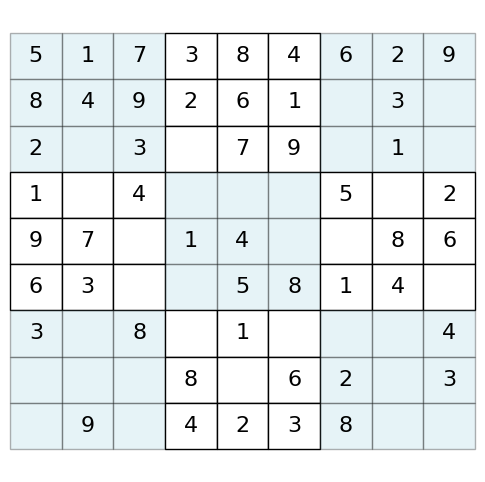

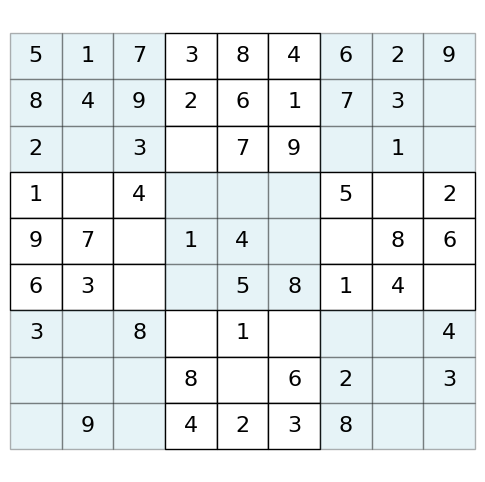

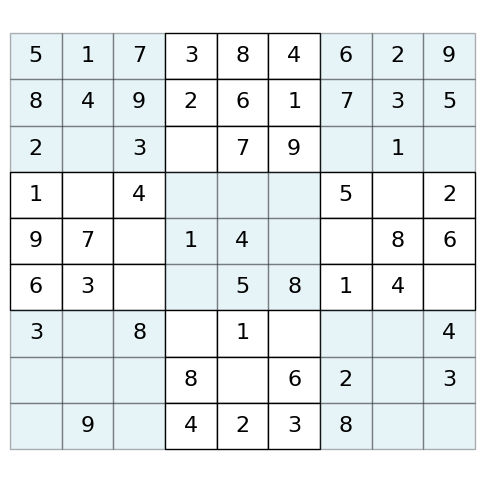

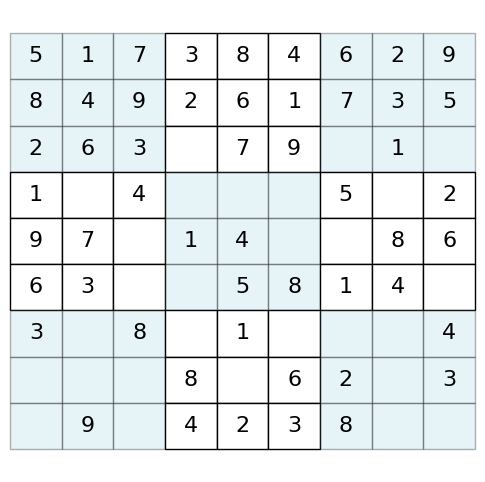

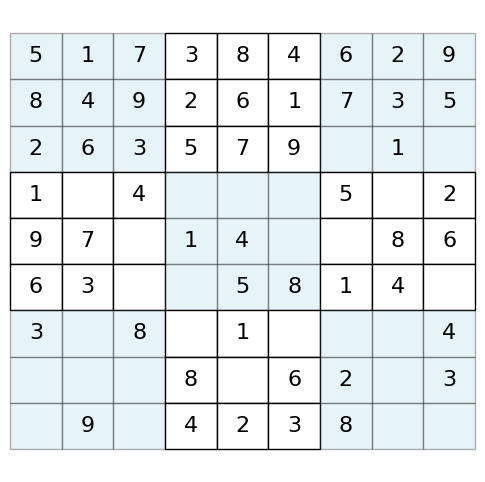

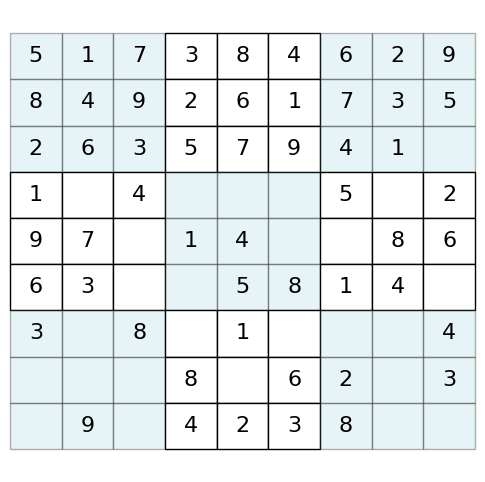

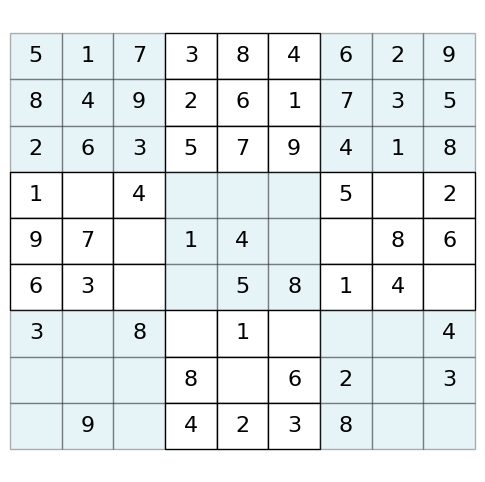

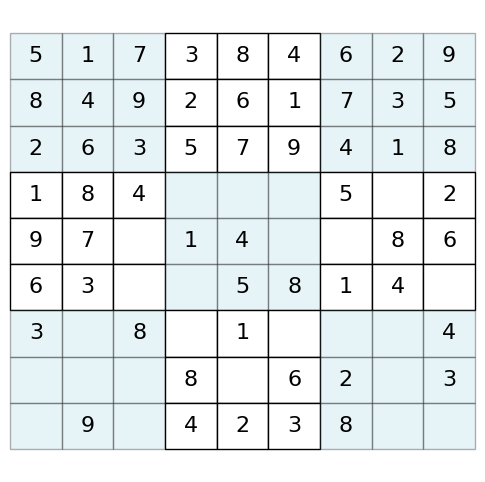

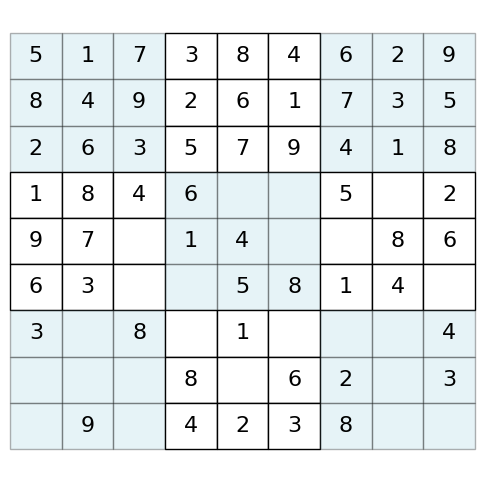

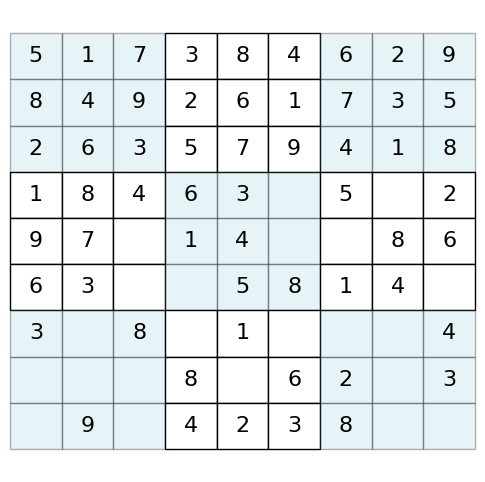

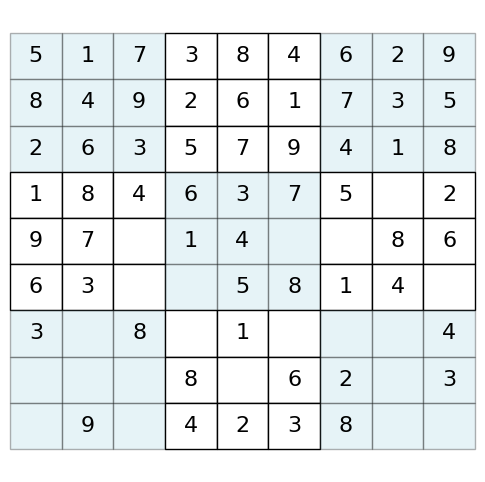

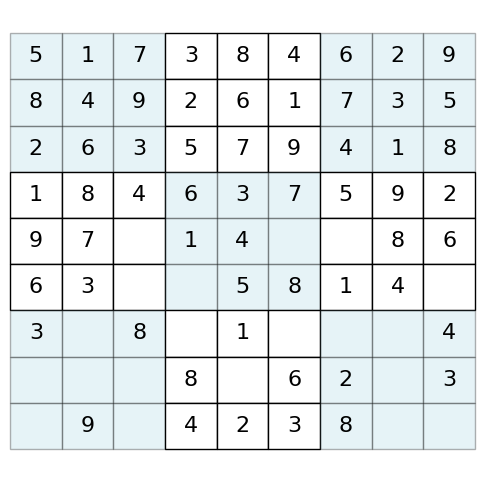

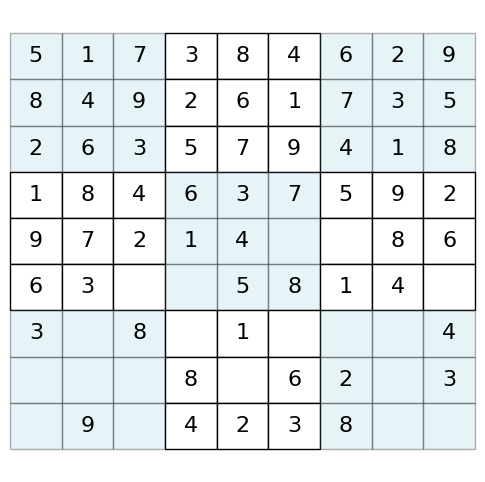

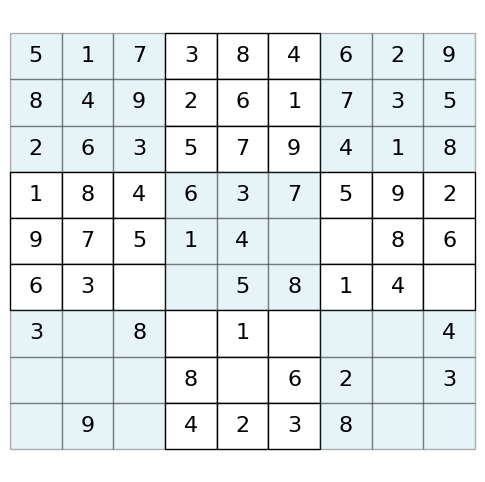

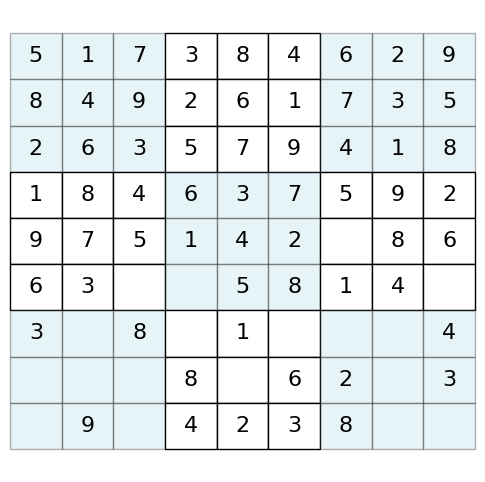

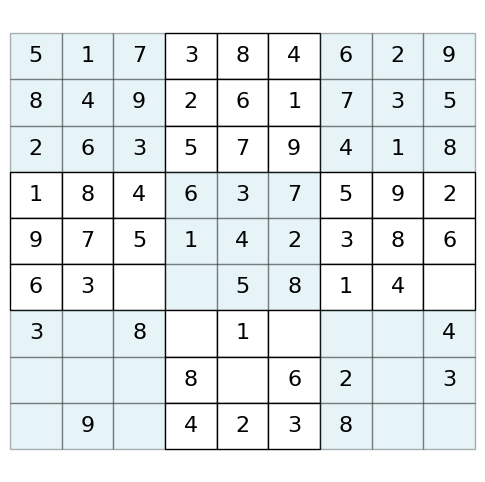

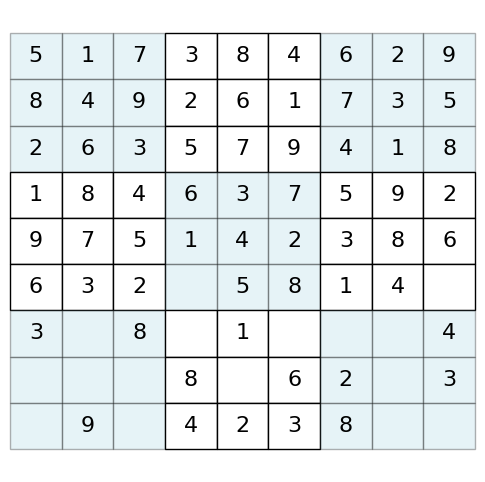

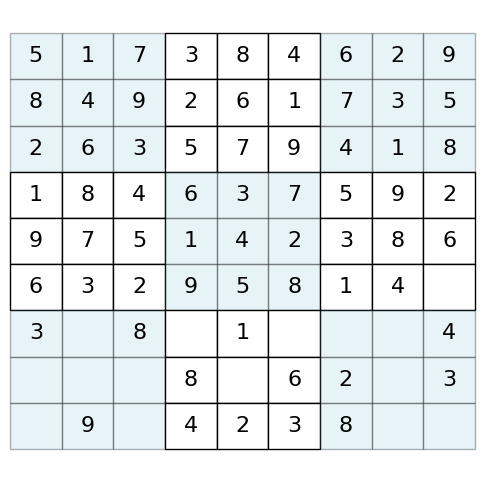

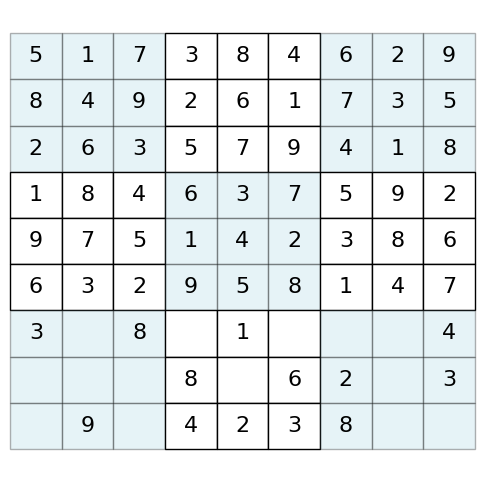

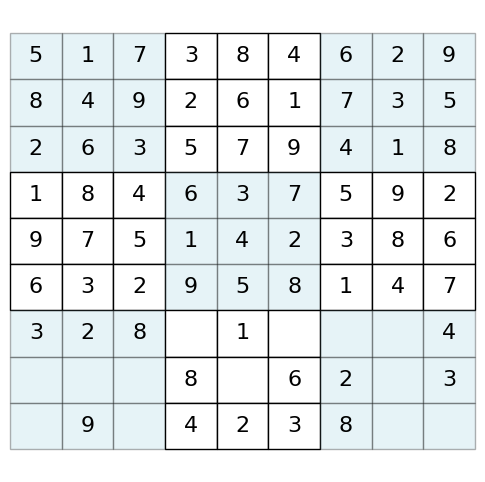

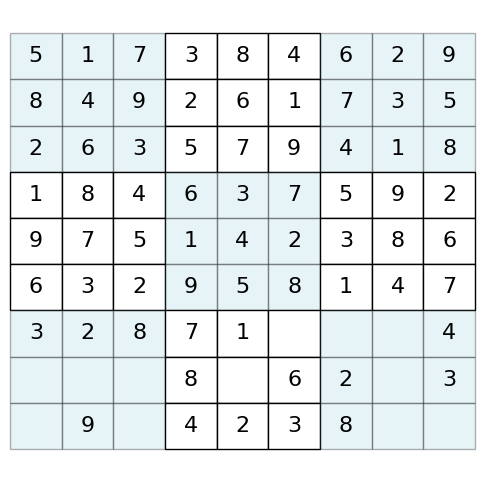

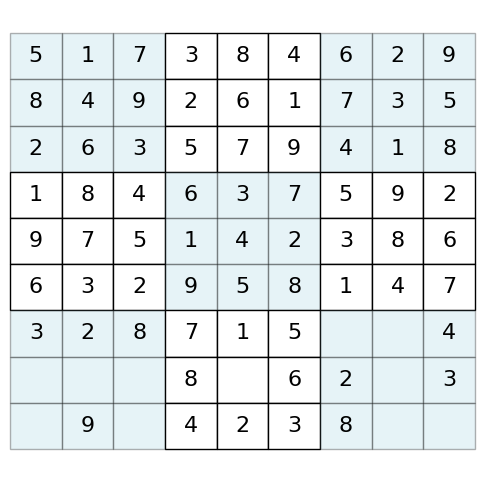

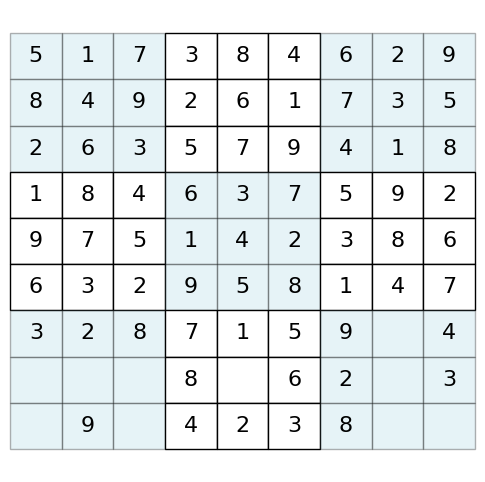

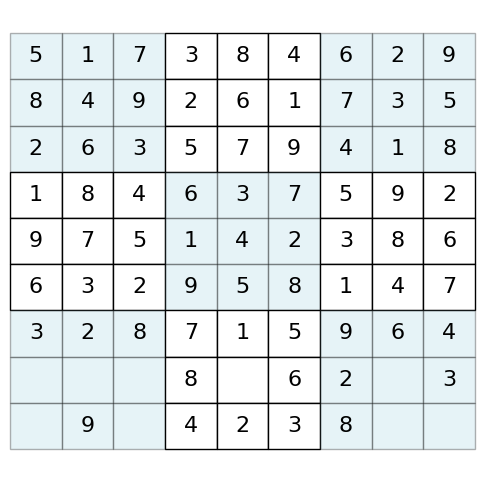

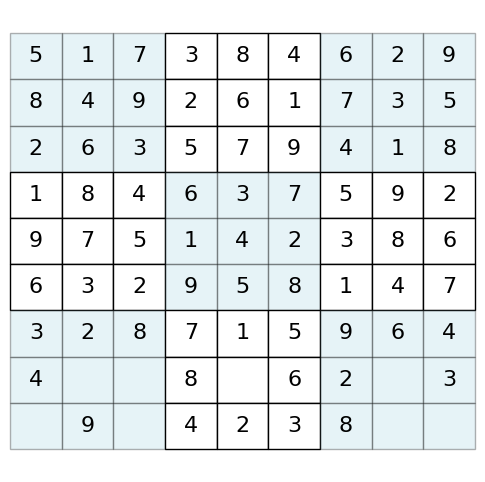

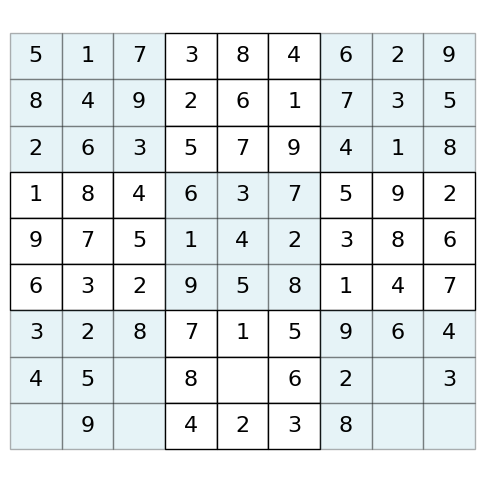

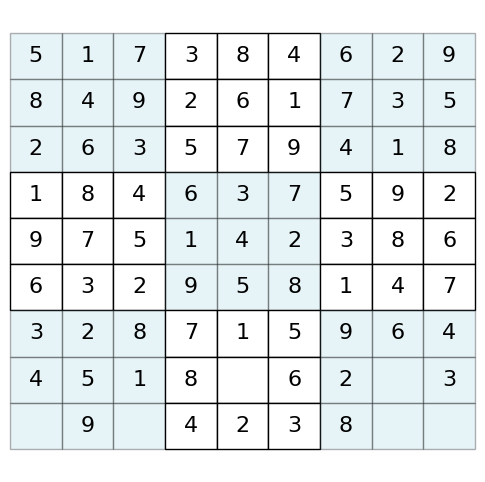

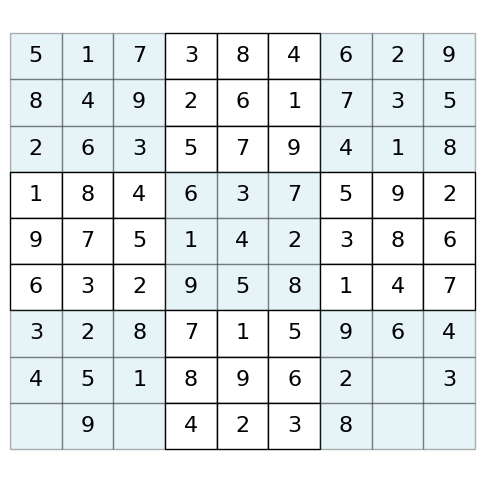

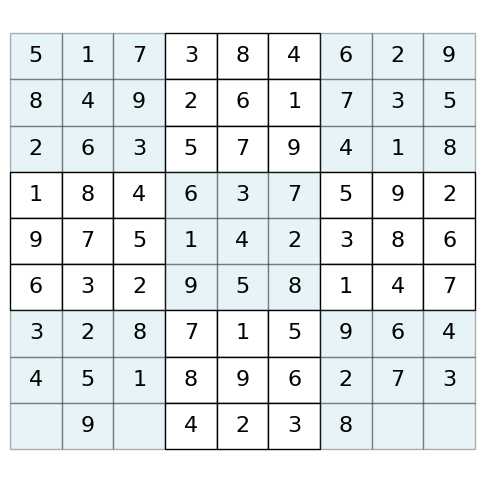

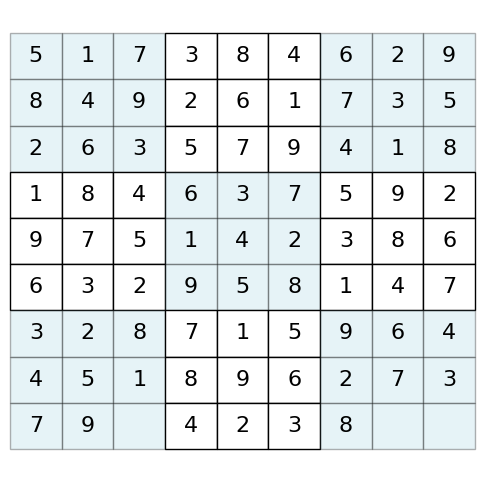

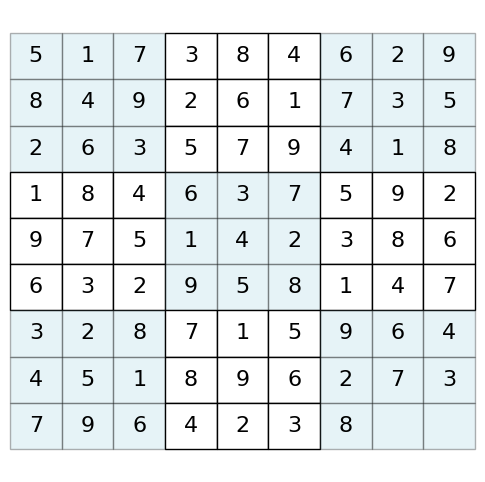

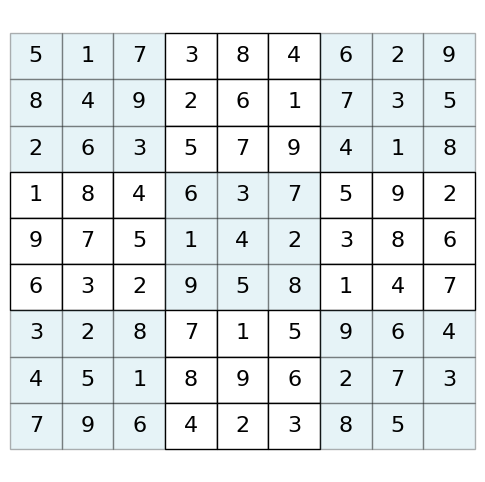

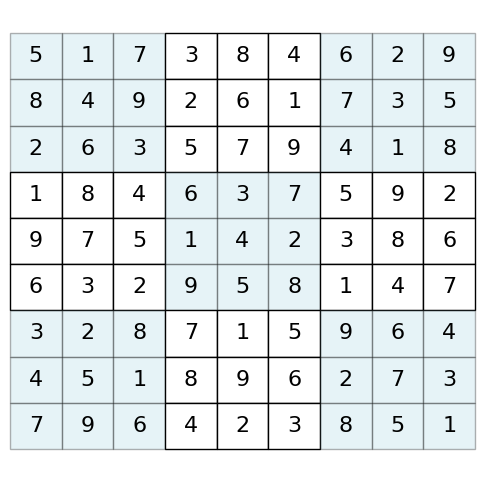

Sudoku resuelto:


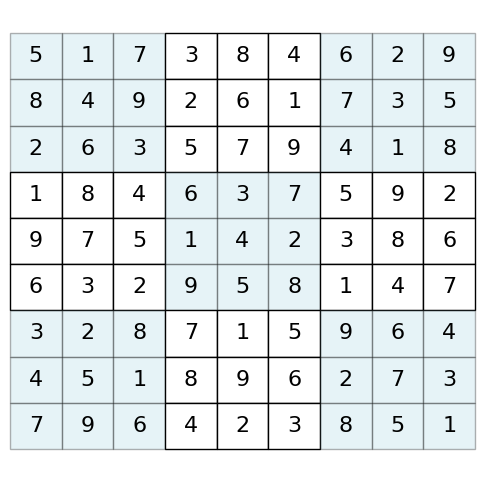

Resultados para la dificultad 'medio':
Pasos: 0, tiempo de ejecución: 0.0000 segundos, memoria usada: 0.00 MB


In [76]:
def main():
    # Menú de selección de dificultad
    print("Selecciona el nivel de dificultad del sudoku:")
    print("1. Bajo")
    print("2. Medio")


    dificultad = input("Ingresa el número de la dificultad deseada (1, 2): ")

    if dificultad == '1':
        nivel_dificultad = 'bajo'
    elif dificultad == '2':
        nivel_dificultad = 'medio'
    # Generar un sudoku basado en la dificultad seleccionada
    sud = genera_sudoku(nivel_dificultad)

    # Verificar si el sudoku es válido antes de resolverlo
    if es_valido(sud):
        # Mostrar el sudoku inicial
        print("Sudoku inicial:")
        dibujar_sudoku(sud, sud)

        # Resolver el sudoku utilizando backtracking
        print("Resolviendo sudoku...")
        resultado = resolver_sudoku(sud)

        # Verificar y mostrar el resultado
        if resultado:
            print("Sudoku resuelto:")
            dibujar_sudoku(sud, sud)
        else:
            print("No se pudo resolver el sudoku.")
    else:
        print("El sudoku generado no es válido.")

    # Medir el rendimiento del algoritmo
    historico = {nivel_dificultad: []}
    history = []
    resultado, steps, time_taken, memory_used = measure_performance(resolver_sudoku, deepcopy(sud), nivel_dificultad, history)
    historico[nivel_dificultad].append({
        "steps": steps,
        "time": time_taken,
        "memory": memory_used
    })

    # Imprimir resultados
    print(f"Resultados para la dificultad '{nivel_dificultad}':")
    print(f"Pasos: {steps}, tiempo de ejecución: {time_taken:.4f} segundos, memoria usada: {memory_used / (1024 ** 2):.2f} MB")

# Ejecución principal
if __name__ == "__main__":
    main()
